In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Perceptron class from sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

### Regression MLPs

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid, = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968588

### Classification MLPs

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, random_state=42, test_size=0.1)
X_train, X_valid, y_train, y_valid, = train_test_split(
    X_train_full, y_train_full, random_state=42, test_size=0.1)

mlp_clf = MLPClassifier(hidden_layer_sizes=[10], random_state=42, max_iter=1000)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)

X_new = [[2, 0.5], [3, 1]]
y_pred = pipeline.predict(X_new)
y_pred

array([ True, False])

In [5]:
pipeline.score(X_valid, y_valid)

1.0

### Implementing MLPs with Keras (!)

In [6]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
# Scale the pixel intensities
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

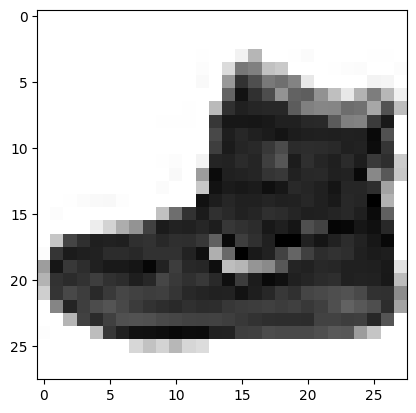

In [11]:
plt.imshow(X_train[0], cmap="binary")

### Creating the model using the sequential API

In [12]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))  # without the batch size - only the shape of the instances
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-04-03 09:31:44.711279: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-04-03 09:31:44.711296: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-03 09:31:44.711341: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-03 09:31:44.711395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-03 09:31:44.711414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# Alternatively - pass a list of layers and drop the Input layer
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation="softmax")
])

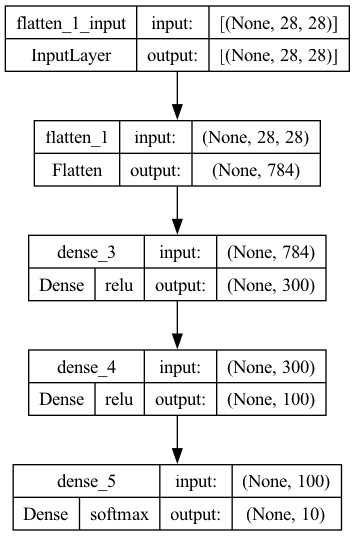

In [14]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
model.get_layer('dense_3') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01363183, -0.0064534 , -0.03357818, ...,  0.04057486,
         0.05770628, -0.00602245],
       [-0.03769851, -0.00991012,  0.02514662, ..., -0.0160962 ,
        -0.0063583 , -0.01822722],
       [-0.05236876, -0.03247916, -0.05243875, ...,  0.04046609,
        -0.05584462, -0.01234635],
       ...,
       [-0.01618595, -0.01764088, -0.00329108, ...,  0.01477209,
        -0.03136854, -0.02013789],
       [ 0.02045064, -0.05833961,  0.01563741, ...,  0.01267207,
         0.06807442, -0.00845388],
       [ 0.05424432,  0.02514328, -0.07062188, ...,  0.03845251,
        -0.0449319 , -0.04701321]], dtype=float32)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
# Compile the model to specify loss function, optimizer, metrics etc.
# When we have sparse labels (e.g. from 0 to 9): use sparse_categorical_crossentropy
# One-hot vector labels (e.g. [0., 0., 1., 0., ..., 0.] for class 2): use categorical_crossentropy
# Binary classification: use binary_crossentropy
# NOTE: we should tune the learning rate when using optimizer="sgd"
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
  14/1719 [..............................] - ETA: 6s - loss: 2.3388 - accuracy: 0.1719  

2024-04-03 09:31:45.277184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.7134 - accuracy: 0.7594 - val_loss: 0.5200 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5103 - accuracy: 0.8220 - val_loss: 0.4849 - val_accuracy: 0.8224
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4738 - accuracy: 0.8356 - val_loss: 0.4542 - val_accuracy: 0.8382
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4582 - accuracy: 0.8403 - val_loss: 0.4330 - val_accuracy: 0.8466
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4456 - accuracy: 0.8451 - val_loss: 0.4328 - val_accuracy: 0.8472
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4377 - accuracy: 0.8475 - val_loss: 0.4464 - val_accuracy: 0.8446
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4331 - accuracy: 0.8495 - val_loss: 0.4292 - val_accuracy: 0.8486
Epo

Oh oh! We get nan loss and accuracy drops after a few epochs! This seems to be an tensorflow-metal (on Apple Silicon) issue.
Someone suggested to use tanh activation function instead of relu. Let's try it:

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6706 - accuracy: 0.7787 - val_loss: 0.4968 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4727 - accuracy: 0.8335 - val_loss: 0.4417 - val_accuracy: 0.8380
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4322 - accuracy: 0.8473 - val_loss: 0.4136 - val_accuracy: 0.8512
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4105 - accuracy: 0.8543 - val_loss: 0.3955 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3932 - accuracy: 0.8590 - val_loss: 0.3850 - val_accuracy: 0.8586
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3801 - accuracy: 0.8642 - val_loss: 0.3910 - val_accuracy: 0.8576
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3698 - accuracy: 0.8667 - val_loss: 0.3709 - val_accuracy:

Using `tanh` activation function seems to help.

I wonder what is the issue with ReLU.. maybe the fact that it is not differentiable at z = 0 and its derivative is 0 for z < 0?

Let's try also softplus activation function which is a smooth variant of ReLU:

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation=tf.keras.activations.softplus),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.softplus),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8320 - accuracy: 0.7179 - val_loss: 0.5743 - val_accuracy: 0.7930
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5569 - accuracy: 0.8018 - val_loss: 0.5270 - val_accuracy: 0.8062
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5029 - accuracy: 0.8216 - val_loss: 0.4772 - val_accuracy: 0.8272
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4772 - accuracy: 0.8318 - val_loss: 0.4493 - val_accuracy: 0.8406
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4562 - accuracy: 0.8395 - val_loss: 0.4434 - val_accuracy: 0.8394
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4414 - accuracy: 0.8443 - val_loss: 0.4433 - val_accuracy: 0.8386
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4308 - accuracy: 0.8487 - val_loss: 0.4228 - val_accuracy:

`softplus` seems ok too. Let's keep that in mind for the time being.

We may have a penalty in terms of performance (relu's main advantage is that it is fast) but what can you do...

In [25]:
# Let's try to familiarize ourselves with shape errors
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[29, 28]),
#     tf.keras.layers.Dense(300, activation=tf.keras.activations.softplus),
#     tf.keras.layers.Dense(100, activation=tf.keras.activations.softplus),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid))

In [26]:
# Use the wrong loss
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(300, activation=tf.keras.activations.softplus),
#     tf.keras.layers.Dense(100, activation=tf.keras.activations.softplus),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])
# model.compile(loss="categorical_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid))

In [27]:
# Remove the Flatten layer
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(300, activation=tf.keras.activations.softplus),
#     tf.keras.layers.Dense(100, activation=tf.keras.activations.softplus),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid))

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [30]:
history.history

{'loss': [0.8319823145866394,
  0.5569268465042114,
  0.5028631687164307,
  0.477220356464386,
  0.4561792016029358,
  0.4414079189300537,
  0.4308372735977173,
  0.4206526577472687,
  0.41182079911231995,
  0.4036434590816498,
  0.3975549042224884,
  0.39125096797943115,
  0.38610801100730896,
  0.3806838095188141,
  0.3763628304004669,
  0.37096887826919556,
  0.36705347895622253,
  0.3636661171913147,
  0.35978245735168457,
  0.356462299823761,
  0.3528011441230774,
  0.3487282395362854,
  0.3460271656513214,
  0.34258919954299927,
  0.3393532335758209,
  0.3370760977268219,
  0.33399656414985657,
  0.33213841915130615,
  0.3289774954319,
  0.3268956243991852],
 'accuracy': [0.7178727388381958,
  0.801800012588501,
  0.8216363787651062,
  0.831818163394928,
  0.8394908905029297,
  0.8442727327346802,
  0.848690927028656,
  0.8526181578636169,
  0.8541091084480286,
  0.8585454821586609,
  0.8592908978462219,
  0.8615090847015381,
  0.863945484161377,
  0.8649272918701172,
  0.8665272

<Axes: xlabel='Epoch'>

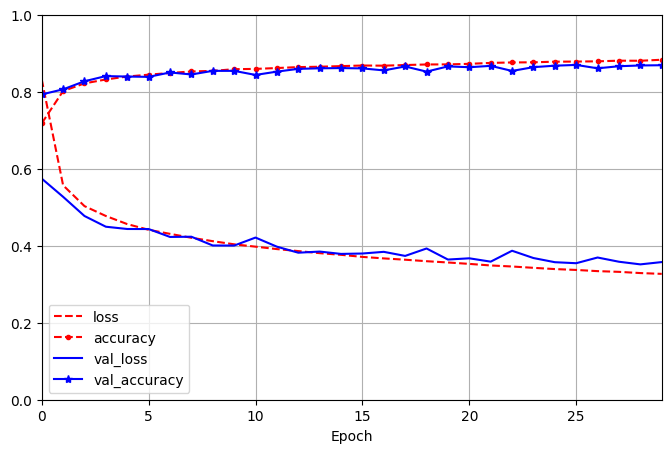

In [31]:
# plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

In [32]:
# Let's continue training for a few more epochs
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3235 - accuracy: 0.8830 - val_loss: 0.3666 - val_accuracy: 0.8624
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3218 - accuracy: 0.8841 - val_loss: 0.3550 - val_accuracy: 0.8678
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3180 - accuracy: 0.8847 - val_loss: 0.3468 - val_accuracy: 0.8748
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3177 - accuracy: 0.8863 - val_loss: 0.3450 - val_accuracy: 0.8730
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3148 - accuracy: 0.8862 - val_loss: 0.3517 - val_accuracy: 0.8680
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3123 - accuracy: 0.8870 - val_loss: 0.3509 - val_accuracy: 0.8716
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3108 - accuracy: 0.8868 - val_loss: 0.3505 - val_accuracy:

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3682 - accuracy: 0.8667


[0.36822932958602905, 0.8666999936103821]

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 47ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.04, 0.  , 0.92],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP using the Sequential API

In [38]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="softplus"),
    tf.keras.layers.Dense(50, activation="softplus"),
    tf.keras.layers.Dense(50, activation="softplus"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)  # must be called before model.fit()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 7ms/step - loss: 0.7040 - root_mean_squared_error: 0.8391 - val_loss: 3.9026 - val_root_mean_squared_error: 1.9755
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5001 - root_mean_squared_error: 0.7072 - val_loss: 0.8968 - val_root_mean_squared_error: 0.9470
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4652 - root_mean_squared_error: 0.6820 - val_loss: 1.4117 - val_root_mean_squared_error: 1.1881
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4408 - root_mean_squared_error: 0.6639 - val_loss: 0.4072 - val_root_mean_squared_error: 0.6382
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4219 - root_mean_squared_error: 0.6496 - val_loss: 0.4126 - val_root_mean_squared_error: 0.6423
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4059 - root_mean_squared_error: 0.6371 - val_loss: 0.4584 - val_

<Axes: xlabel='Epoch'>

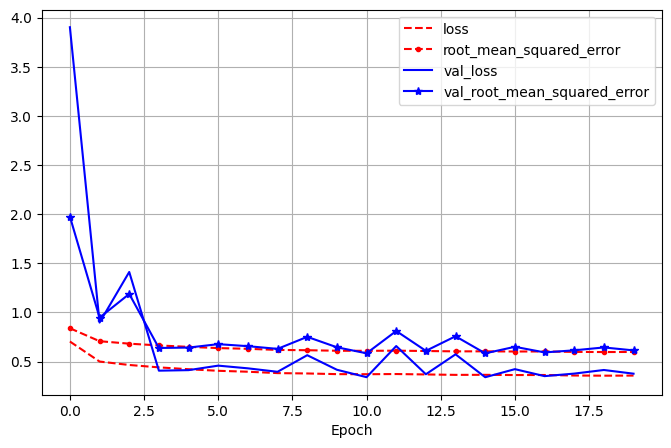

In [39]:
# plot the learning curves
pd.DataFrame(history.history).plot(
    figsize=(8, 5), grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_12 (Dense)            (None, 50)                450       
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5618 (21.95 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 17 (72.00 Byte)
__________________

In [41]:
norm_layer.get_weights()

[array([ 3.8917589e+00,  2.8624548e+01,  5.4559393e+00,  1.0996355e+00,
         1.4242802e+03,  2.9588675e+00,  3.5646435e+01, -1.1958442e+02],
       dtype=float32),
 array([3.6453257e+00, 1.5979272e+02, 6.5044355e+00, 2.1665320e-01,
        1.2006890e+06, 5.5761123e+00, 4.5563760e+00, 4.0037251e+00],
       dtype=float32),
 11610]

### Building Complex Models Using the Functional API

In [42]:
# Wide and Deep architecture: Some or all the inputs are directly connected to the outputs
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="softplus")
hidden_layer2 = tf.keras.layers.Dense(30, activation="softplus")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

# We call each layer object like a function, passing it the output of the previous layer
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 8)                    17        ['input_2[0][0]']             
 tion)                                                                                            
                                                                                                  
 dense_16 (Dense)            (None, 30)                   270       ['normalization_1[0][0]']     
                                                                                                  
 dense_17 (Dense)            (None, 30)                   930       ['dense_16[0][0]']        

In [44]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)  # must be called before model.fit()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8925 - root_mean_squared_error: 0.9447 - val_loss: 0.5074 - val_root_mean_squared_error: 0.7123
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4998 - root_mean_squared_error: 0.7070 - val_loss: 0.4994 - val_root_mean_squared_error: 0.7067
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4634 - root_mean_squared_error: 0.6807 - val_loss: 0.8663 - val_root_mean_squared_error: 0.9308
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4561 - root_mean_squared_error: 0.6753 - val_loss: 1.3359 - val_root_mean_squared_error: 1.1558
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4445 - root_mean_squared_error: 0.6667 - val_loss: 2.6354 - val_root_mean_squared_error: 1.6234
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4513 - root_mean_squared_error: 0.6718 - val_loss: 1.4999 - val_

In [45]:
# Send some features through the wide path and some other features (possibly overlapping)
# through the deep path
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="softplus")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="softplus")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])  # functional interface to the Concatenate layer
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

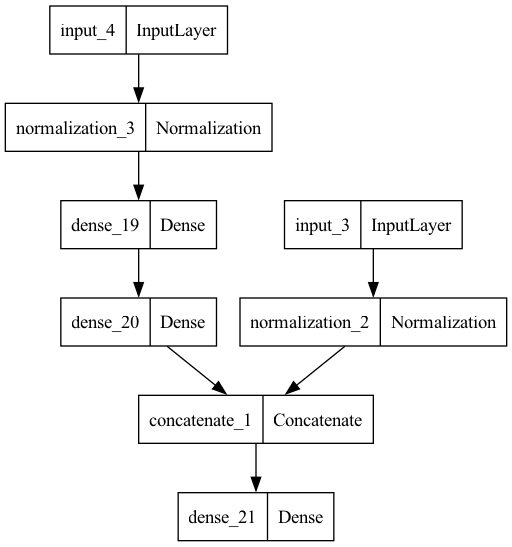

In [46]:
tf.keras.utils.plot_model(model)

In [47]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test, rmse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 6ms/step - loss: 0.8882 - root_mean_squared_error: 0.9424 - val_loss: 0.5933 - val_root_mean_squared_error: 0.7703
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5301 - root_mean_squared_error: 0.7281 - val_loss: 0.6786 - val_root_mean_squared_error: 0.8238
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4813 - root_mean_squared_error: 0.6938 - val_loss: 0.4454 - val_root_mean_squared_error: 0.6674
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4633 - root_mean_squared_error: 0.6807 - val_loss: 0.4746 - val_root_mean_squared_error: 0.6889
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4561 - root_mean_squared_error: 0.6754 - val_loss: 0.4292 - val_root_mean_squared_error: 0.6552
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4493 - root_mean_squared_error: 0.6703 - val_loss: 0.6226 - val_

In [48]:
# Adding an extra output.
# Same as above, up to the main output layer
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="softplus")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="softplus")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])  # functional interface to the Concatenate layer
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

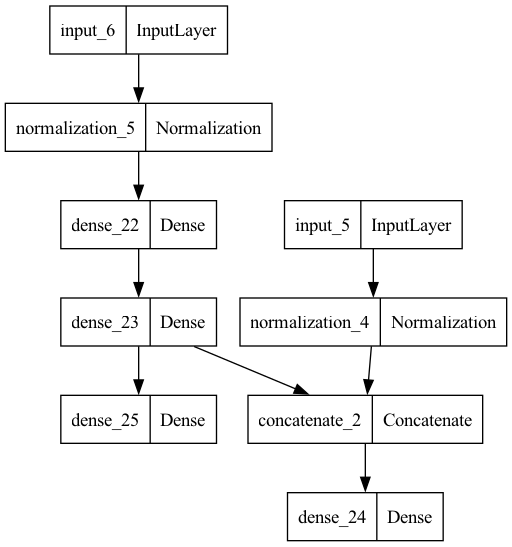

In [49]:
tf.keras.utils.plot_model(model)

In [50]:
# Each output needs its own loss. We supply loss_weights since we care
# much more about the main output than the auxiliary ouput (which is there for regularization)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [51]:
 # we also need to provide labels for each output. In this case, we use the same labels for both
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 1.4370 - dense_24_loss: 1.3942 - dense_25_loss: 1.8215 - dense_24_root_mean_squared_error: 1.1808 - dense_25_root_mean_squared_error: 1.3496 - val_loss: 1.0055 - val_dense_24_loss: 0.8644 - val_dense_25_loss: 2.2752 - val_dense_24_root_mean_squared_error: 0.9297 - val_dense_25_root_mean_squared_error: 1.5084
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.6832 - dense_24_loss: 0.6160 - dense_25_loss: 1.2880 - dense_24_root_mean_squared_error: 0.7848 - dense_25_root_mean_squared_error: 1.1349 - val_loss: 0.5936 - val_dense_24_loss: 0.5320 - val_dense_25_loss: 1.1472 - val_dense_24_root_mean_squared_error: 0.7294 - val_dense_25_root_mean_squared_error: 1.0711
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5471 - dense_24_loss: 0.4981 - dense_25_loss: 0.9875 - dense_24_root_mean_squared_error: 0.7058 - dense_25_root_mean_squared_error: 0.9937 - val_loss: 1.044

In [52]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 5ms/step - loss: 0.4339 - dense_24_loss: 0.4160 - dense_25_loss: 0.5954 - dense_24_root_mean_squared_error: 0.6450 - dense_25_root_mean_squared_error: 0.7716


In [53]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 54ms/step


In [54]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 13ms/step


{'dense_24': array([[0.4519375],
        [1.8662901],
        [3.4103966]], dtype=float32),
 'dense_25': array([[0.6318111],
        [2.177391 ],
        [2.8092778]], dtype=float32)}

### Using the Subclassing API to Build Dynamic Models

In [55]:
# Create the previous WideAndDeepModel using the Subclassing API
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="softplus", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
    
model = WideAndDeepModel(30, activation="softplus", name="my_cool_model")



In [58]:
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 1.0098 - output_1_loss: 0.9190 - output_2_loss: 1.8279 - output_1_root_mean_squared_error: 0.9586 - output_2_root_mean_squared_error: 1.3520 - val_loss: 0.6483 - val_output_1_loss: 0.5744 - val_output_2_loss: 1.3135 - val_output_1_root_mean_squared_error: 0.7579 - val_output_2_root_mean_squared_error: 1.1461
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5949 - output_1_loss: 0.5283 - output_2_loss: 1.1939 - output_1_root_mean_squared_error: 0.7269 - output_2_root_mean_squared_error: 1.0927 - val_loss: 0.5641 - val_output_1_loss: 0.4521 - val_output_2_loss: 1.5722 - val_output_1_root_mean_squared_error: 0.6724 - val_output_2_root_mean_squared_error: 1.2539
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.5249 - output_1_loss: 0.4766 - output_2_loss: 0.9601 - output_1_root_mean_squared_error: 0.6903 - output_2_root_mean_squared_error: 0.9799 - val_loss: 2.129

In [59]:
model.summary()

Model: "my_cool_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  multiple                  11        
 tion)                                                           
                                                                 
 normalization_7 (Normaliza  multiple                  13        
 tion)                                                           
                                                                 
 dense_26 (Dense)            multiple                  210       
                                                                 
 dense_27 (Dense)            multiple                  930       
                                                                 
 dense_28 (Dense)            multiple                  36        
                                                                 
 dense_29 (Dense)            multiple                

In [60]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

162/162 [==============================] - 1s 6ms/step - loss: 0.4347 - output_1_loss: 0.4179 - output_2_loss: 0.5860 - output_1_root_mean_squared_error: 0.6464 - output_2_root_mean_squared_error: 0.7655


[0.4346904456615448,
 0.41788041591644287,
 0.5859800577163696,
 0.6464366912841797,
 0.7654933333396912]

### Saving and Restoring a Model

In [61]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [62]:
model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 55ms/step


In [63]:
model.save_weights("my_weights")

In [64]:
model.load_weights("my_weights")

### Using Callbacks

In [65]:
# Save regular checkpoints of your models at the end of each epoch
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_best_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)


Epoch 1/20
363/363 [==============================] - 4s 9ms/step - loss: 0.4489 - output_1_loss: 0.4310 - output_2_loss: 0.6098 - output_1_root_mean_squared_error: 0.6565 - output_2_root_mean_squared_error: 0.7809 - val_loss: 0.4518 - val_output_1_loss: 0.4370 - val_output_2_loss: 0.5855 - val_output_1_root_mean_squared_error: 0.6610 - val_output_2_root_mean_squared_error: 0.7652
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4476 - output_1_loss: 0.4301 - output_2_loss: 0.6047 - output_1_root_mean_squared_error: 0.6558 - output_2_root_mean_squared_error: 0.7776 - val_loss: 0.4348 - val_output_1_loss: 0.4123 - val_output_2_loss: 0.6376 - val_output_1_root_mean_squared_error: 0.6421 - val_output_2_root_mean_squared_error: 0.7985
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.4426 - output_1_loss: 0.4251 - output_2_loss: 0.6001 - output_1_root_mean_squared_error: 0.6520 - output_2_root_mean_squared_error: 0.7747 - val_loss: 0.407

In [66]:
# Early stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=50,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50
363/363 [==============================] - 3s 9ms/step - loss: 0.4257 - output_1_loss: 0.4111 - output_2_loss: 0.5573 - output_1_root_mean_squared_error: 0.6412 - output_2_root_mean_squared_error: 0.7465 - val_loss: 0.3980 - val_output_1_loss: 0.3831 - val_output_2_loss: 0.5317 - val_output_1_root_mean_squared_error: 0.6190 - val_output_2_root_mean_squared_error: 0.7292
Epoch 2/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4293 - output_1_loss: 0.4149 - output_2_loss: 0.5587 - output_1_root_mean_squared_error: 0.6441 - output_2_root_mean_squared_error: 0.7475 - val_loss: 0.4338 - val_output_1_loss: 0.4195 - val_output_2_loss: 0.5630 - val_output_1_root_mean_squared_error: 0.6477 - val_output_2_root_mean_squared_error: 0.7504
Epoch 3/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4267 - output_1_loss: 0.4124 - output_2_loss: 0.5554 - output_1_root_mean_squared_error: 0.6422 - output_2_root_mean_squared_error: 0.7453 - val_loss: 0.396

In [68]:
# Custom callback
class PrintValTrainratioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[PrintValTrainratioCallback()]
)

Epoch 1/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4194 - output_1_loss: 0.4052 - output_2_loss: 0.5473 - output_1_root_mean_squared_error: 0.6366 - output_2_root_mean_squared_error: 0.7398 - val_loss: 0.3926 - val_output_1_loss: 0.3776 - val_output_2_loss: 0.5278 - val_output_1_root_mean_squared_error: 0.6145 - val_output_2_root_mean_squared_error: 0.7265
Epoch 2/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4229 - output_1_loss: 0.4089 - output_2_loss: 0.5490 - output_1_root_mean_squared_error: 0.6394 - output_2_root_mean_squared_error: 0.7410 - val_loss: 0.5004 - val_output_1_loss: 0.4857 - val_output_2_loss: 0.6334 - val_output_1_root_mean_squared_error: 0.6969 - val_output_2_root_mean_squared_error: 0.7958
Epoch 3/50
363/363 [==============================] - 3s 8ms/step - loss: 0.4211 - output_1_loss: 0.4072 - output_2_loss: 0.5462 - output_1_root_mean_squared_error: 0.6381 - output_2_root_mean_squared_error: 0.7390 - val_loss: 0.394

### Using TensorBoard for Visualization

In [71]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/run_2024_04_03_11_50_48')

In [73]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="softplus"),
    tf.keras.layers.Dense(30, activation="softplus"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

# Use the Tensorboard Callback to create the logdir and collect the event files during training
tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir(),
                                                profile_batch=(100, 200))

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2024-04-03 11:55:21.613485: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-04-03 11:55:21.613496: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-04-03 11:55:21.613560: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.


140/363 [==========>...................] - ETA: 1s - loss: 2.1131 - root_mean_squared_error: 1.4537

2024-04-03 11:55:22.265047: I tensorflow/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-04-03 11:55:22.265058: I tensorflow/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.


234/363 [==================>...........] - ETA: 0s - loss: 1.8178 - root_mean_squared_error: 1.3482

2024-04-03 11:55:22.729696: I tensorflow/tsl/profiler/lib/profiler_session.cc:70] Profiler session collecting data.
2024-04-03 11:55:22.765326: I tensorflow/tsl/profiler/lib/profiler_session.cc:131] Profiler session tear down.
2024-04-03 11:55:22.765543: I tensorflow/tsl/profiler/rpc/client/save_profile.cc:144] Collecting XSpace to repository: my_logs/run_2024_04_03_11_55_21/plugins/profile/2024_04_03_11_55_22/nikolaoss-mbp.xplane.pb


363/363 [==============================] - 2s 6ms/step - loss: 1.5897 - root_mean_squared_error: 1.2608 - val_loss: 1.5444 - val_root_mean_squared_error: 1.2427
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9336 - root_mean_squared_error: 0.9663 - val_loss: 0.7986 - val_root_mean_squared_error: 0.8936
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7438 - root_mean_squared_error: 0.8624 - val_loss: 0.6913 - val_root_mean_squared_error: 0.8314
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6918 - root_mean_squared_error: 0.8318 - val_loss: 0.6587 - val_root_mean_squared_error: 0.8116
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6723 - root_mean_squared_error: 0.8200 - val_loss: 0.6491 - val_root_mean_squared_error: 0.8057
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.6560 - root_mean_squared_error: 0.8099 - val_loss: 0.6239 - val_root_mean_s

In [75]:
# Start the Tensorboard server
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1268), started 0:01:13 ago. (Use '!kill 1268' to kill it.)

In [76]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

### Fine-Tuning Neural Network Hyperparameters

In [79]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [80]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [78]:
# Use the keras-tuner library to tune an MLP classifier for the Fashion MNIST dataset
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="softplus"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [81]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 02m 12s]
val_accuracy: 0.8460000157356262

Best val_accuracy So Far: 0.8592000007629395
Total elapsed time: 00h 12m 05s


In [82]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]


In [83]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [84]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8592000007629395


In [85]:
best_trial.metrics.get_last_value("val_accuracy")

0.8592000007629395

In [86]:
# Continue training the best model on the full training set
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3254 - accuracy: 0.8796
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3170 - accuracy: 0.8823
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3090 - accuracy: 0.8860
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3013 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2948 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2884 - accuracy: 0.8916
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2823 - accuracy: 0.8939
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2773 - accuracy: 0.8959
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2726 - accuracy: 0.8971
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss

In [87]:
# Subclass the kt.HyperModel class to fine-tune preprocessing or model.fit arguments
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        # exact same thing as before
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)
        

In [88]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [89]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 50 Complete [00h 01m 12s]
val_accuracy: 0.8723999857902527

Best val_accuracy So Far: 0.878600001335144
Total elapsed time: 00h 36m 05s

Search: Running Trial #51

Value             |Best Value So Far |Hyperparameter
2                 |7                 |n_hidden
203               |100               |n_neurons
0.00046153        |0.00044489        |learning_rate
sgd               |adam              |optimizer
True              |False             |normalize
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
1719/1719 [==============================] - 10s 6ms/step - loss: 2.0929 - accuracy: 0.7010 - val_loss: 0.7597 - val_accuracy: 0.7698
Epoch 2/4
 378/1719 [=====>........................] - ETA: 6:54:46 - loss: 0.6828 - accuracy: 0.7781